In [2]:
#%% Esta celda importa las librerías necesarias 
import numpy as np #Necesaria para el manejo de vectores y matrices 
import pandas as pd #Necesaria para el manejo de datasets
from sklearn.decomposition import PCA
from sklearn.decomposition import FactorAnalysis
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#%% Importación del DataSet
data=pd.read_csv("C:/Users/Pedro/Documents/TFG/Python/Datasets/solarpowergeneration.csv")

#Veamos un informe del dataset 
data.describe()

,distance-to-solar-noon,temperature,wind-direction,wind-speed,sky-cover,visibility,humidity,average-wind-speed-(period),average-pressure-(period),power-generated
count,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2919.000000,2920.000000,2920.000000
mean,0.503294,58.468493,24.953425,10.096986,1.987671,9.557705,73.513699,10.129154,30.017760,6979.846233
std,0.298024,6.841200,6.915178,4.838185,1.411978,1.383884,15.077139,7.261547,0.142006,10312.336413
min,0.050401,42.000000,1.000000,1.100000,0.000000,0.000000,14.000000,0.000000,29.480000,0.000000
25%,0.243714,53.000000,25.000000,6.600000,1.000000,10.000000,65.000000,5.000000,29.920000,0.000000
50%,0.478957,59.000000,27.000000,10.000000,2.000000,10.000000,77.000000,9.000000,30.000000,404.000000
75%,0.739528,63.000000,29.000000,13.100000,3.000000,10.000000,84.000000,15.000000,30.110000,12723.500000
max,1.141361,78.000000,36.000000,26.600000,4.000000,10.000000,100.000000,40.000000,30.530000,36580.000000


In [4]:
data=data.dropna()

In [5]:
data.isna().sum()

distance-to-solar-noon         0
temperature                    0
wind-direction                 0
wind-speed                     0
sky-cover                      0
visibility                     0
humidity                       0
average-wind-speed-(period)    0
average-pressure-(period)      0
power-generated                0
dtype: int64

<Axes: >

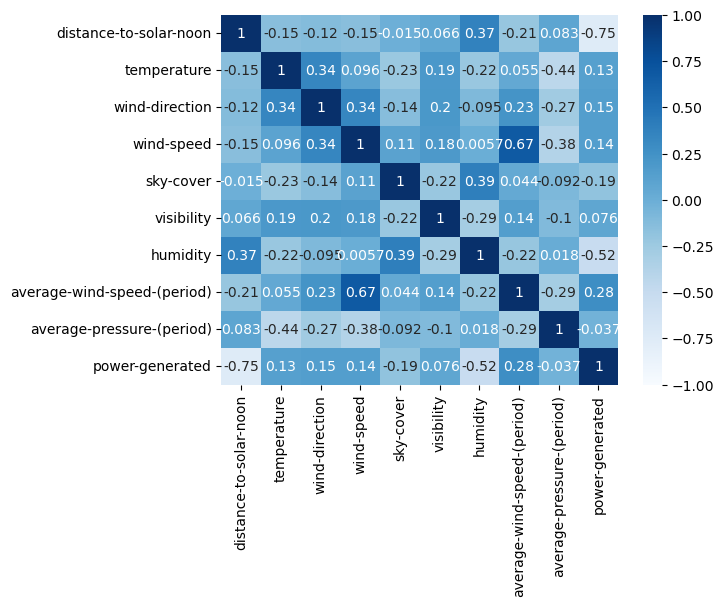

In [6]:
# Representación con un heatmap, pero lo vemos con las correlaciones para que esté todo en la misma escala 
sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True, cmap="Blues")

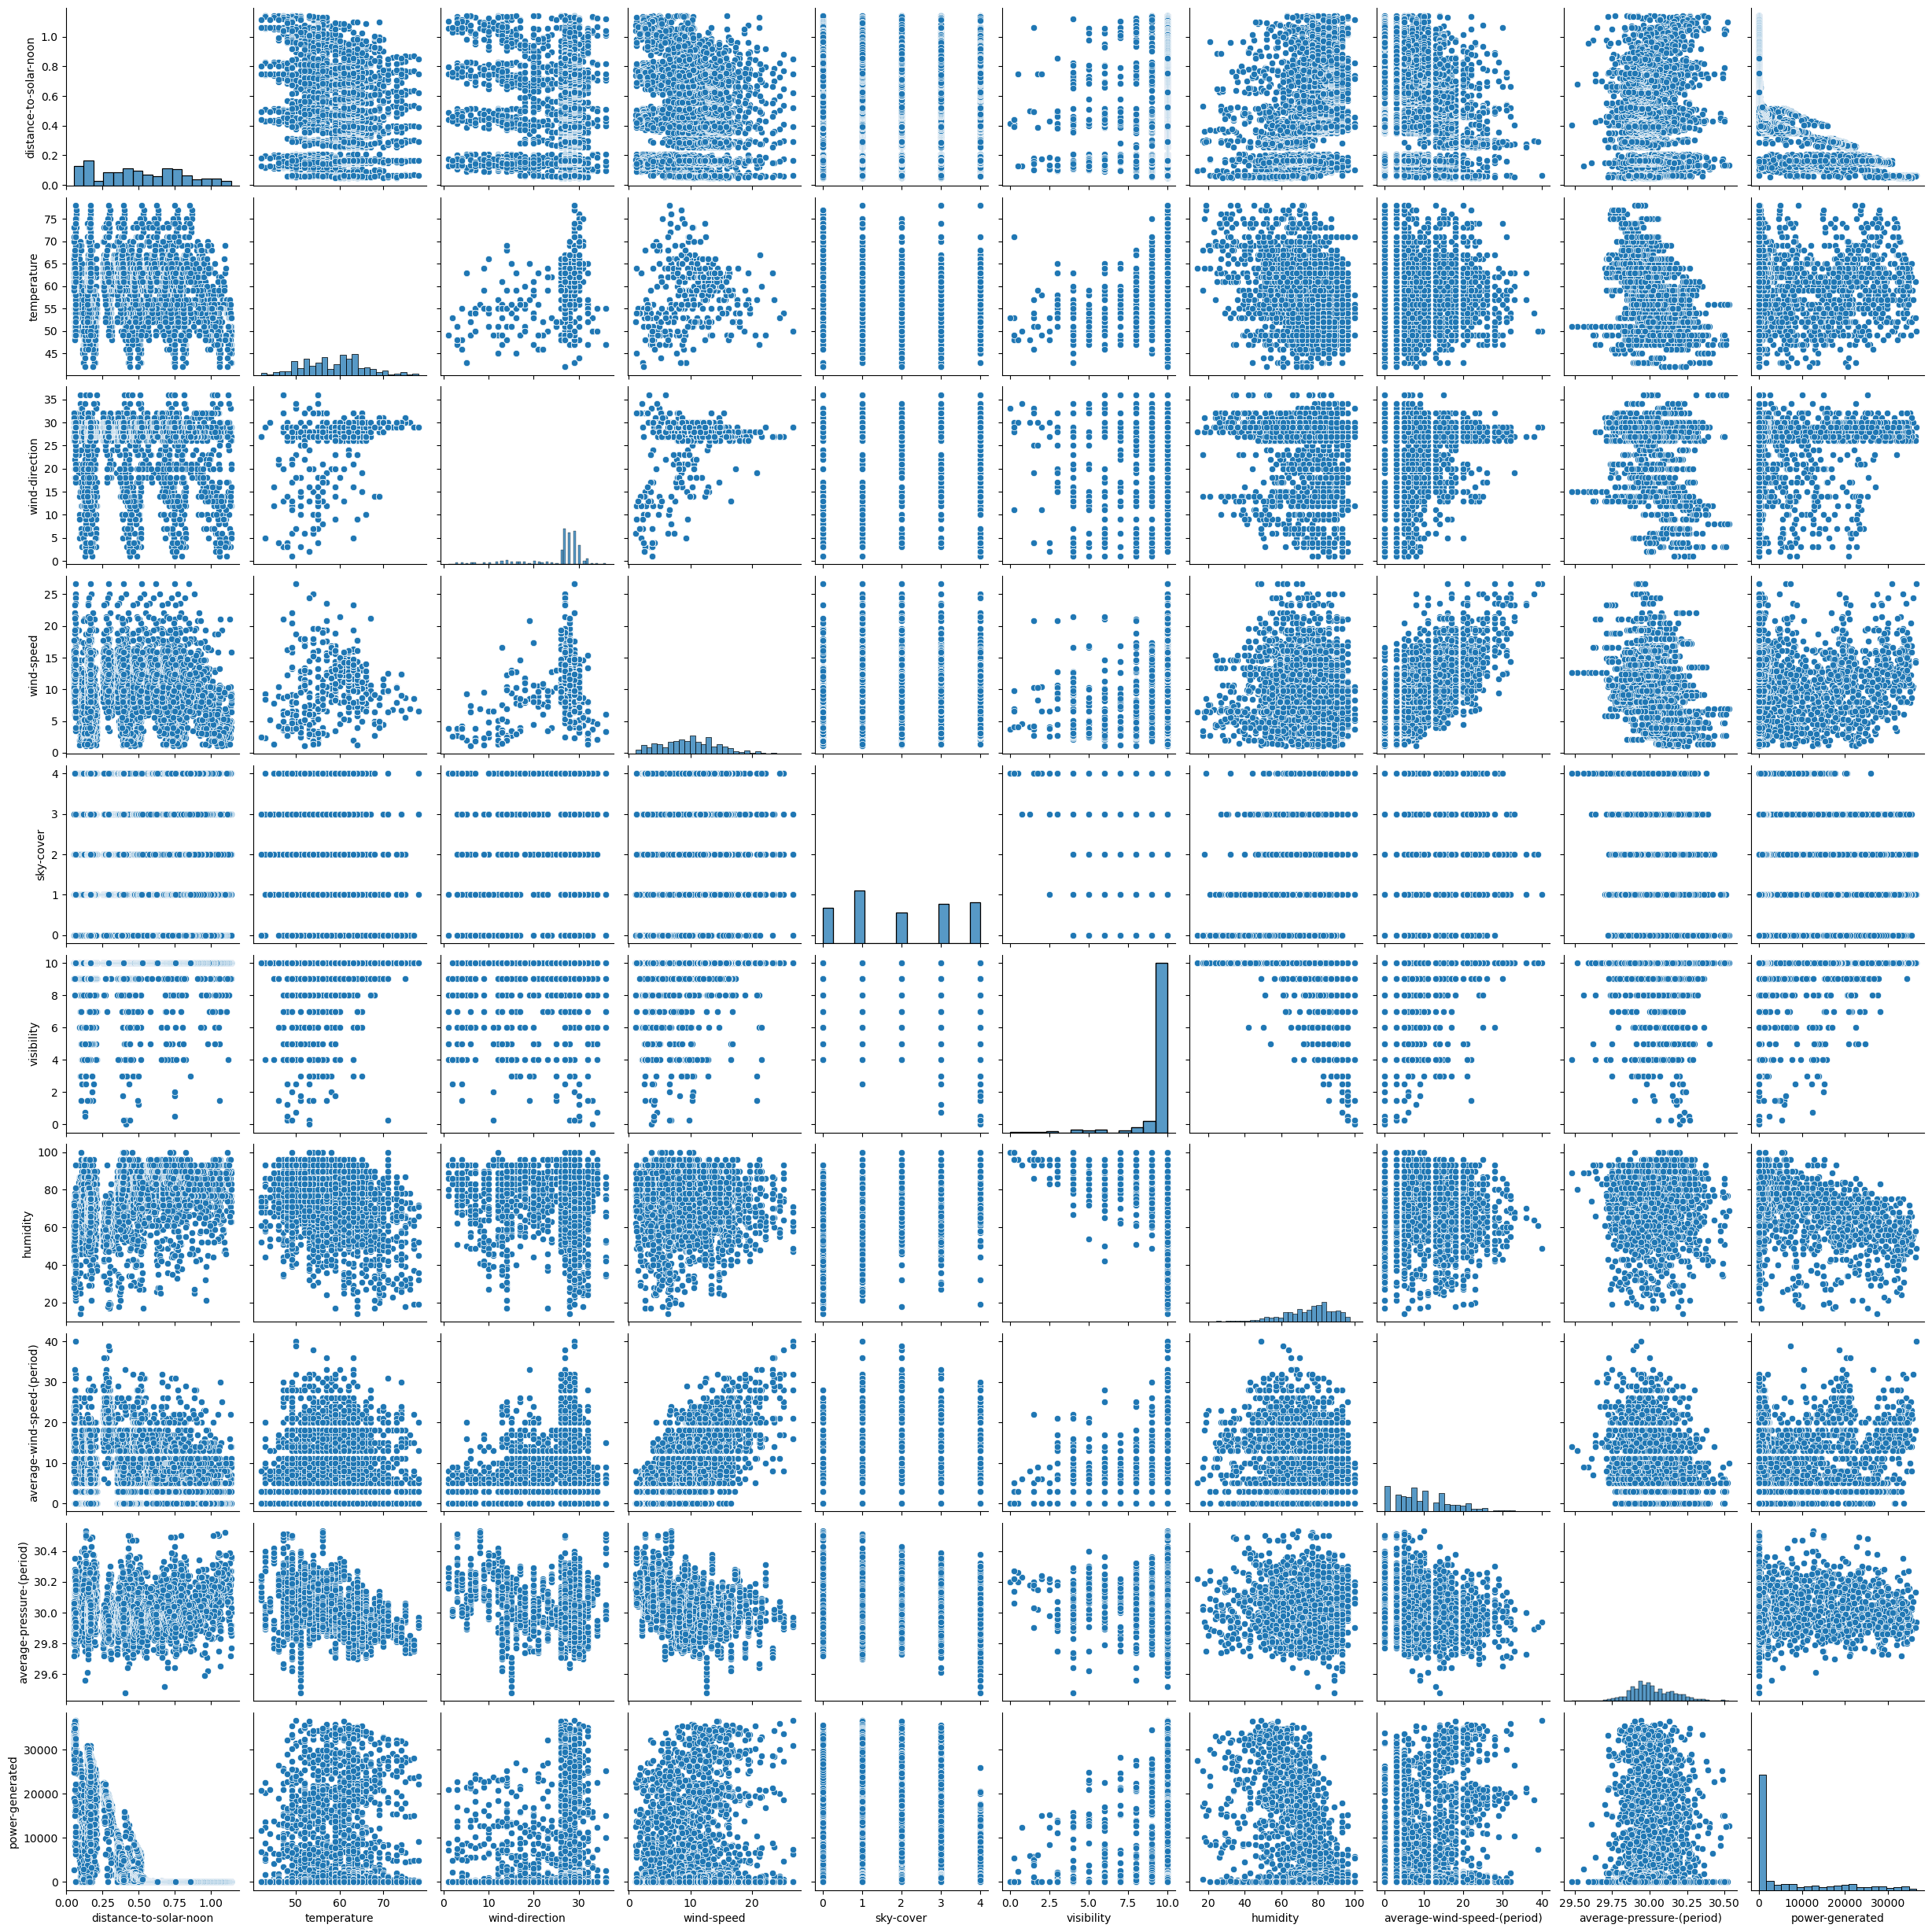

In [7]:
sns.pairplot(data)

El problema ahora es que tenemos 10 variables, 9 predictoras en particular  que queremos mostrar como 2, usamos el PCA para ello con dimensión dos. 

Ahora vamos a tomar una muestra de los datos para que la descomposición en PCA sea clara.

In [8]:
X=data.iloc[:,0:9].values #Numpy Array
X.shape

(2919, 9)

Ahora estandarizamos los valores con el standard Scaler 

# Descomposiciones y Métodos No supervisados

## Análisis de Componentes Principales

In [9]:
X=StandardScaler().fit_transform(X)

In [10]:
pca=PCA(n_components=2)
pca.fit(X)
principalComponents = pca.transform(X) #Hace la transformación la matriz reducida y proyectada

In [11]:
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

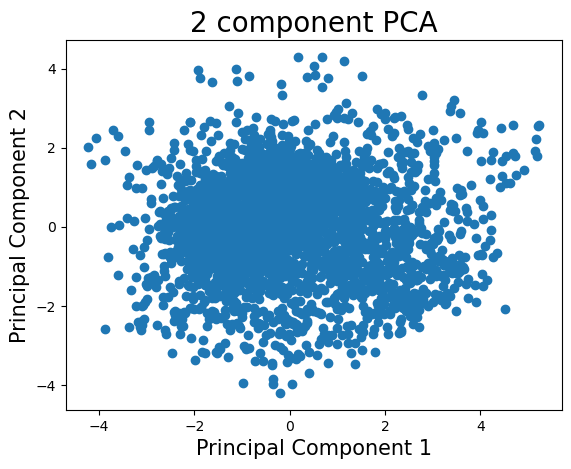

In [12]:
fig, ax = plt.subplots()

ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
ax.scatter(principalDf['principal component 1'].values, principalDf['principal component 2'].values)

Podemos entonces reducir la dimensión de nuestro DataSet a uno de 2 variables, veamos cuanta varianza explica cada una de las componentes.



In [13]:
varianzas_explicadas = pca.explained_variance_ratio_
varianzas_explicadas

array([0.28247686, 0.18397072])

Como se puede ver, la varianza explicada de las dos primeras componentes principales toman el 76 % de la varianza total. 

In [14]:
pca=PCA(n_components=9)
pca.fit(X)
principalComponents = pca.transform(X)
principalDf = pd.DataFrame(data = principalComponents)
varianzas_explicadas = pca.explained_variance_ratio_
varianzas_explicadas.cumsum()

array([0.28247686, 0.46644758, 0.60182904, 0.72063153, 0.80417108,
       0.87825859, 0.92615763, 0.97119624, 1.        ])

Con las 4 primeras componentes, ya se tiene casi el total de la varianza. Por tanto, hemos conseguido reducir a más de la mitad el número de variables. 

## Análisis Factorial

El análisis factorial busca encontrar partiendo de la hipótesis de que la población inicial es una población normal multivariante con p variables, encontrar un conjunto de m < p variables normales que tienen en conjunto una distribución normal m-multivariante incorrelados 

In [47]:
X=data.iloc[:,0:9].values
fa=FactorAnalysis(n_components=2)
X_fa=fa.fit_transform(X)

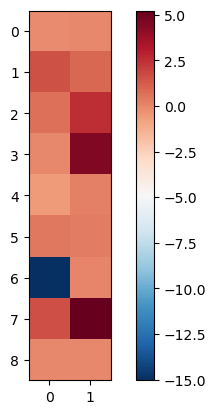

In [48]:
components = fa.components_.T
plt.imshow(components, cmap='RdBu_r')
plt.colorbar()
plt.show()

Por tanto, podemos ver que las variables 3 y 4 tienen una gran importancia en el 2 º factor y que la variable 6 en el factor 1, esto es sin aplicar la rotación Varimax, veamos cual es la diferencia. 

In [49]:
m=fa.components_
n=fa.noise_variance_

In [51]:
m1=m**2
m2 = np.sum(m1,axis=1)
pvar1 = (100*m2[0])/np.sum(m2)
pvar2 = (100*m2[1])/np.sum(m2)

print(pvar1)
print(pvar2)

80.86235406023587
19.137645939764138


Es decir, el primer factor contiene el 81% de la variación común de los factores y el segundo el 19%, veamos ahora cuando de la variación total acumula cada una. 

In [53]:
pvar1_with_noise = (100*m2[0])/(np.sum(m2)+np.sum(n))
pvar2_with_noise = (100*m2[1])/(np.sum(m2)+np.sum(n))
print(pvar1_with_noise, pvar2_with_noise)

57.67271161003185 13.649366853167948


En la anterior celda vemos que el 57,7% de la variación total es recogida por el primer factor, y el segundo factor recoge el cerca del 14% de la variación total de los datos. En total  un 71% es recogida por los factores comunes. 

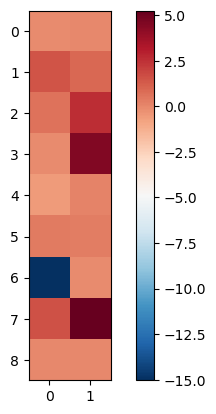

In [39]:
fa_varmax=FactorAnalysis(n_components=2, rotation='varimax')
X_fa_varmax=fa_varmax.fit_transform(X)
components_varmax = fa_varmax.components_.T
plt.imshow(components_varmax, cmap='RdBu_r')
plt.colorbar()
plt.show()

# Regresión Lineal y Red Neuronal

Ahora vamos hacer una regresión lineal para encontrar un modelo predictivo de la cantidad de energía generada, mediante un algoritmo de regresión lineal y una red neuronal. 

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

Para poder comprobar la calidad del ajuste, tenemos que separar los datos en dos subconjunto, el conjunto de entrenamiento y el de selección o validación. A mayores se puede tener un tercer subconjunto de testing. 


In [ ]:
X=data.iloc[:,0:9].values
y=data.iloc[:,9].values
y.shape

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
reg=LinearRegression()
reg.fit(X_train,y_train)

In [ ]:
reg.coef_

In [ ]:
y_pred=reg.predict(X_test)

In [ ]:
print("MSE: %.2f" %mean_squared_error(y_test,y_pred))


In [ ]:
print("Coefficient of determination: %.2f" % r2_score(y_test,y_pred))

Por tanto, a nivel predictivo el modelo lineal no es muy eficaz ya que la cantidad de la variable de poder generado que puede explicar una relación lineal es del 62%

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=100,activation='sigmoid'),
    tf.keras.layers.Dense(units=100,activation='sigmoid'),
    tf.keras.layers.Dense(units=200,activation='relu'),
    tf.keras.layers.Dense(units=1,activation='relu'),
])

In [ ]:
model.compile(loss='mean_squared_error')

In [ ]:
model.fit(X_train,y_train,epochs=1000)

In [ ]:
y_pred= model.predict(X_test)


In [ ]:
print("MSE: %.2f" %mean_squared_error(y_test,y_pred))

Ahora para poder elegir el modelo, es decir, afinar el número de neuronas que necesitamos, el tipo de error etc... Utilizaremos la librería de C++ OpenNN que nos permite afinar cuantas neuronas serán necesarias. Además la librería dispone de una utilidad en la que colaboré durante las prácticas que es el algoritmo genético para la selección de variables de entrada 